In [123]:
# LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [124]:
# DATASET

df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.rename(columns = {'AspectRation':'AspectRatio'}, inplace = True)
df = df.astype({'Area': 'float64'})
df = df.astype({'Class': 'string'})
df = df.drop(['ConvexArea', 'ShapeFactor3'], axis=1) # REMEMBER TO PUT THIS COMMAND AFTER CORRELATION ANALYSIS
#df.info()
#df.describe()

#df.describe()
#df[df['Class']=='BOMBAY'].describe()

# FEATURES NAMES
'Area'
'Perimeter'
'MajorAxisLength'
'MinorAxisLength'
'AspectRation'
'Eccentricity'
'ConvexArea'
'EquivDiameter'
'Extent'
'Solidity'
'roundness'
'Compactness'
'ShapeFactor1'
'ShapeFactor2'
'ShapeFactor3'
'ShapeFactor4'


'ShapeFactor4'

In [125]:
# FEATURES ANALYSIS

#Ed = np.sqrt(4 * df.loc[6453].Area / np.pi)
#Co = Ed / df.loc[6453].MajorAxisLength
#SF3 = df.loc[6453].Area / (np.pi * (df.loc[6453].MajorAxisLength / 2) * (df.loc[6453].MajorAxisLength / 2))

In [126]:
# BOXPLOTS

#df.boxplot('Area', by='Class')

In [127]:
# HISTOGRAMS

#df.hist(figsize=(20,15),bins=100)
#df.groupby('Class').hist(figsize=(20,15),bins=100)

<Axes: >

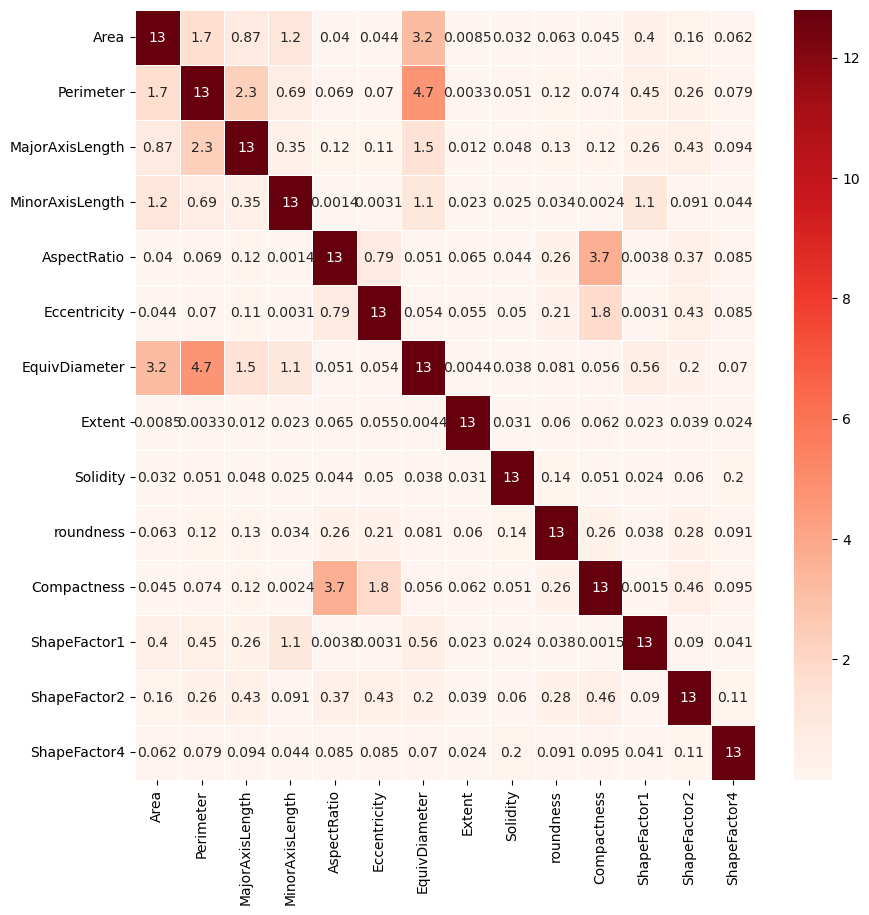

In [128]:
# CORRELATION
# Note: Area and ConvexArea are perfectly correlated: we already noticed that mathematically one is the square root of the other.
# Note: Compactness and Shape Factor 3 are perfectly correlated
# Proposition: Erase ConvexArea and Shape Factor 3

fig, ax = plt.subplots(figsize=(10,10)) 
CORR_MAP = df.corr(numeric_only = True)
Steepness = 10.0
ModIn1 = 2.01
if ModIn1 < 2.0 :
    ModIn1 = 2.0 
HIGH_CORR = (np.tan((np.pi/ModIn1) * np.abs(CORR_MAP)) * (1 / Steepness)) #LOW INFORMATION
LOW_CORR  = (np.tan((np.pi/ModIn1) * (1 - np.abs(CORR_MAP))) * (1 / Steepness)) #HIGH INFORMATION

sns.heatmap( HIGH_CORR ,annot=True,linewidths=.5, ax=ax, cmap='Reds')


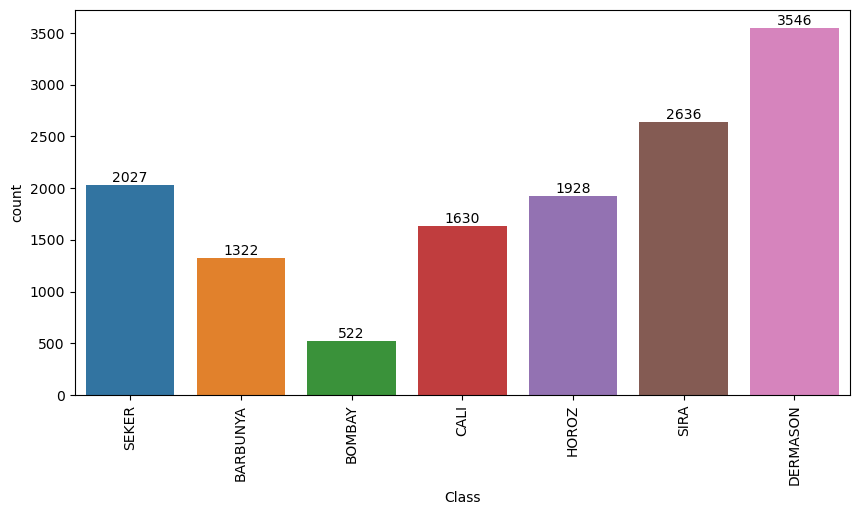

In [129]:
# CLASSES ANALYSIS

fig, ax = plt.subplots(figsize=(10,5));
graph = sns.countplot(ax=ax, x='Class', data=df);
graph.set_xticklabels(graph.get_xticklabels(),rotation=90);
graph.bar_label(ax.containers[0]);

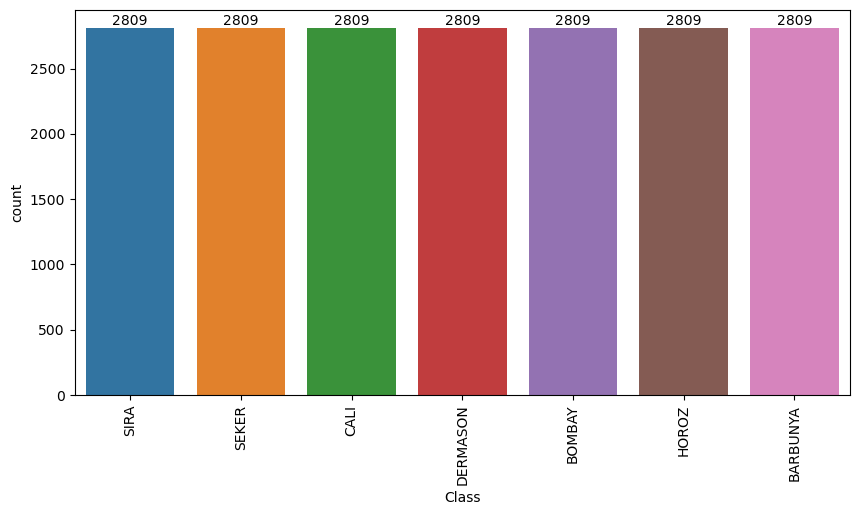

In [130]:
# OVERSAMPLING - SMOTE

X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df.iloc[:,-1:], test_size=0.2)
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
df_train_smote = pd.merge(X_train_smt, y_train_smt, left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(10,5));
graph = sns.countplot(ax=ax, x='Class', data=df_train_smote);
graph.set_xticklabels(graph.get_xticklabels(),rotation=90);
graph.bar_label(ax.containers[0]);

# ATTENZIONE, IL NUMERO DI ISTANZE PER CLASSE CAMBIA CONTINUAMENTE, DOPO LO SPLIT LA CLASSE CHE NE ESCE "VINCITRICE",
# LA MAGGIORMENTE SELEZIONA DETERMINA LA SOGLIA DI OVERSAMPLING


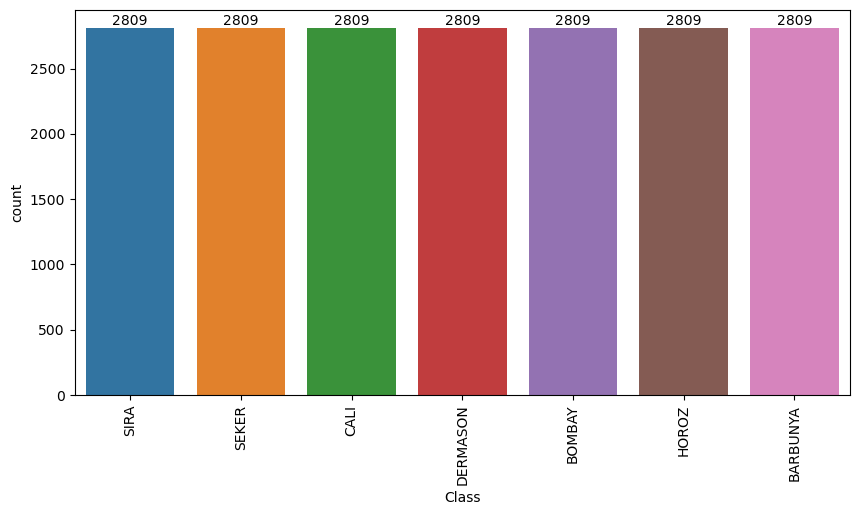

In [131]:
# OVERSAMPLING - ADASYN

X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df.iloc[:,-1:], test_size=0.2)
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
df_train_adasyn = pd.merge(X_train_smt, y_train_smt, left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(10,5));
graph = sns.countplot(ax=ax, x='Class', data=df_train_adasyn);
graph.set_xticklabels(graph.get_xticklabels(),rotation=90);
graph.bar_label(ax.containers[0]);

# ATTENZIONE, IL NUMERO DI ISTANZE PER CLASSE CAMBIA CONTINUAMENTE, DOPO LO SPLIT LA CLASSE CHE NE ESCE "VINCITRICE",
# LA MAGGIORMENTE SELEZIONA DETERMINA LA SOGLIA DI OVERSAMPLING